------------------
 ## Suicide Sentiment Analysis Project 
 - Using TF-IDF As Feature Extraction
 - Using Some Classification models As RandomForest, LinearSVC, MultinomialNB
 - Using Some Preprocessing as Lemmatization, Removing Stop Words
 - Finally,  The best Results in this notebook is 91%.
----------------

In [115]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
nltk.download('vader_lexicon')
import neattext.functions as nfx

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/saied/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Read Suicide_Detection File

In [116]:
Suicide = pd.read_csv('Suicide_Detection.csv')
data_split = np.array_split(Suicide, 20)
Suicide = data_split[0]
Suicide = Suicide.drop('Unnamed: 0',axis=1)

## Preparing For Stopword removal and lemmatization

In [117]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/saied/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
X = Suicide.drop('class', axis=1)
y = Suicide['class']


# Text Pre Proceessing

In [119]:
# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make limmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)
    
    # removing mails
    for r in regexes_to_remove:
        X['text'][i] = re.sub(r, '', review)


<a id='another_cell'></a>
### -ttttttttt

[TF-IDF ](#another_cell)

## Splitting Data

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature extraction

- ### TF-IDF

In [121]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer_n12 = TfidfVectorizer(max_features=10000, ngram_range=(1,2))


X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['text'])
X_tfidf_test = tfidf_vectorizer.transform(X_test['text'])

X_tfidf_train_n12= tfidf_vectorizer_n12.fit_transform(X_train['text'])
X_tfidf_test_n12=tfidf_vectorizer_n12.transform(X_test['text'])

In [122]:
print(X_tfidf_train.shape)

(8122, 10000)


 - ### Bag of wards 

In [123]:
vectorizer = CountVectorizer()
  
X_bow_train = vectorizer.fit_transform(X_train['text'])
X_bow_test = vectorizer.transform(X_test['text'])


- ### Vedor


In [125]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
def get_vedor_scores(data):
    sid=SIA()
    vedor_df=data.copy()
    vedor_df['scores'] = vedor_df['text'].apply(lambda txt: sid.polarity_scores(str(txt)))
    
    vedor_df['neg_score'] = vedor_df['scores'].apply(lambda txt: txt['neg'])
    vedor_df['neu_score'] =vedor_df['scores'].apply(lambda txt: txt['neu'])
    vedor_df['pos_score'] = vedor_df['scores'].apply(lambda txt: txt['pos'])
    vedor_df['compound'] = vedor_df['scores'].apply(lambda txt: txt['compound'])
    vedor_df.drop('scores', axis=1, inplace=True)
    vedor_df.drop('text', axis=1, inplace=True)
    return vedor_df


In [126]:
X_vedor_train = get_vedor_scores(X_train)
X_vedor_test= get_vedor_scores(X_test)

In [127]:
X_vedor_train.shape

(8122, 4)

## Feature Scaling

---------------
- As we see the no. of features very large so we need to make feature selection and feature scaling
------------

## Feature Selection

In [128]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# We Can select any model but linearSVC has l1 norm penality which deals with sparse
lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False)
lsvc.fit(X_tfidf_train, y_train)

# This function select the best features that has high weigh
fs = SelectFromModel(lsvc, prefit=True)
# This function redeuce X to the selected features
X_selection = fs.transform(X_tfidf_train)
X_test_selection = fs.transform(X_tfidf_test)


lsvc.fit(X_tfidf_train_n12, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_n12 = fs_n12.transform(X_tfidf_train_n12)
X_test_selection_n12 = fs_n12.transform(X_tfidf_test_n12)

lsvc.fit(X_bow_train, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_bow = fs_n12.transform(X_bow_train)
X_test_selection_bow = fs_n12.transform(X_bow_test)


/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### plotting results function 

In [206]:
import matplotlib.pyplot as plt
def plot_results(data):
    
    barWidth = 0.15
    # set heights of bars
    bars1 = [data[0][0],data[1][0], data[2][0]]
    bars2 = [data[0][1], data[1][1], data[2][1]]
    bars3 = [data[0][2], data[1][2], data[2][2]]
    bars4 = [data[0][3], data[1][3], data[2][3]]
    

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    

    # Make the plot
    plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='tfidf')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='tfidf_n12')
    plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='bow')
    plt.bar(r4, bars4, color='#9a7f5e', width=barWidth, edgecolor='white', label='vedor')
    

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['precision', 'recall', 'f1-score'])

    # Create legend & Show graphic
    plt.legend()
    plt.grid()
    plt.show()

##  Using LinearSVC

In [207]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(X_selection, y_train)
y_predict = lsvc.predict(X_test_selection)

lsvc_n12.fit(X_selection_n12,y_train)
y_predict_n12 = lsvc_n12.predict(X_test_selection_n12)

lsvc_bow.fit(X_selection_bow,y_train)
y_predict_bow = lsvc_bow.predict(X_test_selection_bow)

lsvc.fit(X_vedor_train,y_train)
y_predict_vedor = lsvc.predict(X_vedor_test)

# print(metrics.classification_report(y_test, y_predict_1, target_names=['Suicide', 'Non-Suicide']))
linear_svm_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict)
linear_svm_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_n12)
linear_svm_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)
vedor_svm_results=metrics.precision_recall_fscore_support(y_test, y_predict_vedor)

/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saied/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [208]:
data1 = [[linear_svm_tfidf_results[0][0],linear_svm_tfidf_n12_results[0][0],linear_svm_bow_results[0][0],
          vedor_svm_results[0][0]],
         [linear_svm_tfidf_results[1][0],linear_svm_tfidf_n12_results[1][0],linear_svm_bow_results[1][0],
          vedor_svm_results[1][0]],
         [linear_svm_tfidf_results[2][0],linear_svm_tfidf_n12_results[2][0],linear_svm_bow_results[2][0],
          vedor_svm_results[2][0]]]
data1

[[0.8874709976798144,
  0.8892078071182549,
  0.8771929824561403,
  0.6842394288852279],
 [0.8747855917667239,
  0.8856489422527158,
  0.8862206975414523,
  0.7124070897655803],
 [0.8810826374892025,
  0.8874248066456603,
  0.881683731513083,
  0.6980392156862746]]

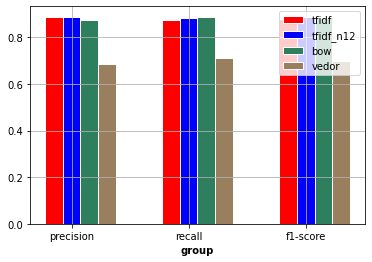

In [209]:
plot_results(data1)

## Using RandomForest

In [145]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_selection, y_train)
y_predict_2 = clf.predict(X_test_selection)

clf.fit(X_selection_n12, y_train)
y_predict_n12_2 = clf.predict(X_test_selection_n12)

clf.fit(X_selection_bow, y_train)
y_predict_bow_2 = clf.predict(X_test_selection_bow)

clf.fit(X_vedor_train, y_train)
y_predict_vedor_2 = clf.predict(X_vedor_test)

In [149]:
RandomForest_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict)
RandomForest_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_n12_2)
RandomForest_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_2)
RandomForest_vedor_results=metrics.precision_recall_fscore_support(y_test, y_predict_vedor_2)
print(metrics.classification_report(y_test, y_predict_2, target_names=['Suicide', 'Non-Suicide']))

              precision    recall  f1-score   support

     Suicide       0.81      0.91      0.86      1749
 Non-Suicide       0.90      0.78      0.84      1733

    accuracy                           0.85      3482
   macro avg       0.85      0.85      0.85      3482
weighted avg       0.85      0.85      0.85      3482



In [210]:
data2 = [[RandomForest_tfidf_results[0][0],RandomForest_tfidf_n12_results[0][0],RandomForest_bow_results[0][0],
          RandomForest_vedor_results[0][0]],
         [RandomForest_tfidf_results[1][0],RandomForest_tfidf_n12_results[1][0],RandomForest_bow_results[1][0],
          RandomForest_vedor_results[1][0]],
         [RandomForest_tfidf_results[2][0],RandomForest_tfidf_n12_results[2][0],RandomForest_bow_results[2][0],
          RandomForest_vedor_results[2][0]]]

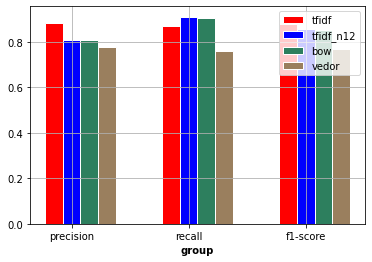

In [211]:
plot_results(data2)

## Using Multinomial Naive Bayes

In [ ]:
mb = MultinomialNB()
mb.fit(X_selection, y_train)
y_predict_3 = mb.predict(X_test_selection)

mb.fit(X_selection_n12, y_train)
y_predict_n12_3 = mb.predict(X_test_selection_n12)

mb.fit(X_selection_bow, y_train)
y_predict_bow_3 = mb.predict(X_test_selection_bow)

mb.fit(X_vedor_train, y_train)
y_predict_vedor_3 = mb.predict(X_vedor_test)

print(metrics.classification_report(y_test, y_predict_3, target_names=['Suicide', 'Non-Suicide']))

mb_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict)
mb_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_n12_3)
mb_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_3)
# mb_vedor_results=metrics.precision_recall_fscore_support(y_test, y_predict_vedor_3)

In [33]:
mb_tfidf_n12_results[0]

array([0.91336353, 0.90909091])

In [22]:
mb_bow_results

(array([0.94002608, 0.83213552]),
 array([0.8151498 , 0.94629305]),
 array([0.87314563, 0.8855504 ]),
 array([1769, 1713]))

## Using Ensamble Learning 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,  SGDClassifier
from sklearn.svm import SVC

In [157]:
log_clf = LogisticRegression(solver="lbfgs")
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(gamma="scale", probability=True)
# mb = MultinomialNB()
sgd = SGDClassifier(alpha=.0001, max_iter=50, loss='log',
                                       penalty="elasticnet", n_jobs=-1)

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('sgd', sgd)],
voting='soft')



In [158]:
voting_clf.fit(X_selection, y_train)
y_predict_4 = voting_clf.predict(X_test_selection)

voting_clf.fit(X_selection_n12, y_train)
y_predict_n12_4 = voting_clf.predict(X_test_selection_n12)

voting_clf.fit(X_selection_bow, y_train)
y_predict_bow_4 = voting_clf.predict(X_test_selection_bow)

voting_clf.fit(X_vedor_train, y_train)
y_predict_vedor_4 = voting_clf.predict(X_vedor_test)

/home/saied/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
print(metrics.classification_report(y_test, y_predict_4, target_names=['Suicide', 'Non-Suicide']))
mb_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_4)
mb_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_n12_4)
mb_tfidf_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_4)
mb_tfidf_vedor_results=metrics.precision_recall_fscore_support(y_test, y_predict_vedor_4)

              precision    recall  f1-score   support

     Suicide       0.91      0.92      0.91      1749
 Non-Suicide       0.92      0.90      0.91      1733

    accuracy                           0.91      3482
   macro avg       0.91      0.91      0.91      3482
weighted avg       0.91      0.91      0.91      3482



In [212]:
data3= [[mb_tfidf_results[0][0],mb_tfidf_n12_results[0][0],mb_tfidf_bow_results[0][0],
          mb_tfidf_vedor_results[0][0]],
         [mb_tfidf_results[1][0],mb_tfidf_n12_results[1][0],mb_tfidf_bow_results[1][0],
          mb_tfidf_vedor_results[1][0]],
         [mb_tfidf_results[2][0],mb_tfidf_n12_results[2][0],mb_tfidf_bow_results[2][0],
          mb_tfidf_vedor_results[2][0]]]

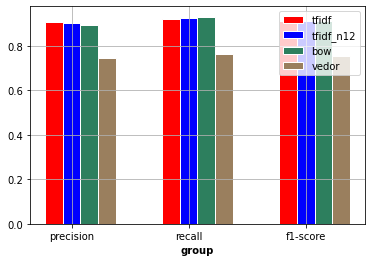

In [213]:
plot_results(data3)

## Using Bagging Method

In [164]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_selection, y_train)
y_pred_5 = bag_clf.predict(X_test_selection)

bag_clf.fit(X_selection_n12, y_train)
y_pred_n12_5 = bag_clf.predict(X_test_selection_n12)

bag_clf.fit(X_selection_bow, y_train)
y_pred_bow_5 = bag_clf.predict(X_test_selection_bow)

bag_clf.fit(X_vedor_train, y_train)
y_pred_vedor_5 = bag_clf.predict(X_vedor_test)
print(metrics.classification_report(y_test, y_pred_5, target_names=['Suicide', 'Non-Suicide']))

              precision    recall  f1-score   support

     Suicide       0.81      0.89      0.85      1749
 Non-Suicide       0.87      0.79      0.83      1733

    accuracy                           0.84      3482
   macro avg       0.84      0.84      0.84      3482
weighted avg       0.84      0.84      0.84      3482



In [165]:
bag_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_pred_5)
bag_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_pred_n12_5)
bag_bow_results=metrics.precision_recall_fscore_support(y_test, y_pred_bow_5)
bag_vedor_results=metrics.precision_recall_fscore_support(y_test, y_pred_vedor_5)

In [214]:
data4= [[bag_tfidf_results[0][0],bag_tfidf_n12_results[0][0],bag_bow_results[0][0],
          bag_vedor_results[0][0]],
         [bag_tfidf_results[1][0],bag_tfidf_n12_results[1][0],bag_bow_results[1][0],
          bag_vedor_results[1][0]],
         [bag_tfidf_results[2][0],bag_tfidf_n12_results[2][0],bag_bow_results[2][0],
          bag_vedor_results[2][0]]]

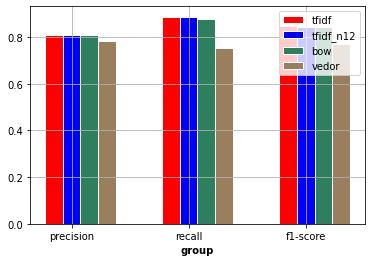

In [215]:
plot_results(data4)